# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | soygaon
Processing Record 4 of Set 1 | banda aceh
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | crane
Processing Record 7 of Set 1 | poltavka
Processing Record 8 of Set 1 | kayangel
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | vadso
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | villa la angostura
Processing Record 22 of Set 1 | antonio enes
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# lats = city_data_df["Lat"]
# max_temps = city_data_df["Max Temp"]
# humidity = city_data_df["Humidity"]
# cloudiness = city_data_df["Cloudiness"]
# wind_speed = city_data_df["Windspeed"]

# city_data_df.to_csv(output_data_file, index_label = "City_ID")

# Show Record Count
city_data_df.count() 

# Display sample data
city_data_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,6.25,65,40,9.26,CL,1727878433
1,margaret river,-33.9500,115.0667,12.01,80,100,12.78,AU,1727878434
2,soygaon,20.6000,75.6167,28.00,73,2,1.82,IN,1727878395
3,banda aceh,5.5577,95.3222,27.41,81,100,3.34,ID,1727878436
4,ribeira grande,38.5167,-28.7000,25.22,83,75,11.83,PT,1727878437


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID") 

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,65,40,9.26,CL,1727878433
1,margaret river,-33.9500,115.0667,12.01,80,100,12.78,AU,1727878434
2,soygaon,20.6000,75.6167,28.00,73,2,1.82,IN,1727878395
3,banda aceh,5.5577,95.3222,27.41,81,100,3.34,ID,1727878436
4,ribeira grande,38.5167,-28.7000,25.22,83,75,11.83,PT,1727878437


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

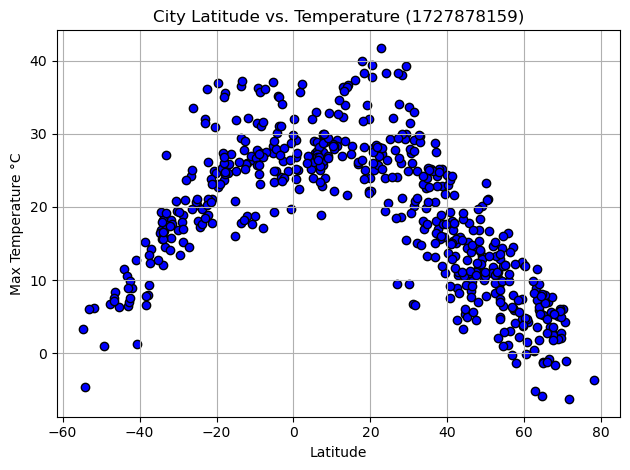

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

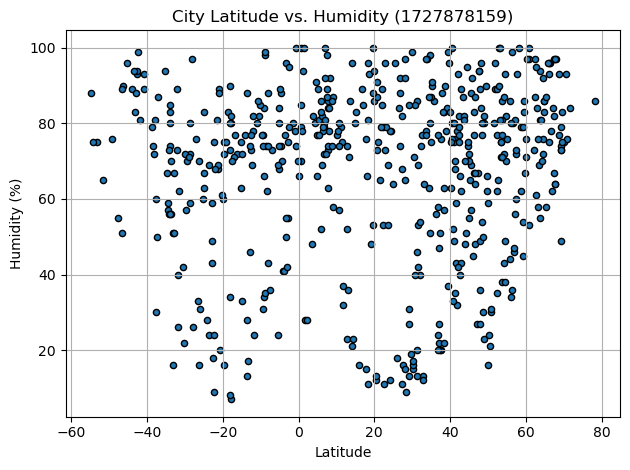

In [8]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

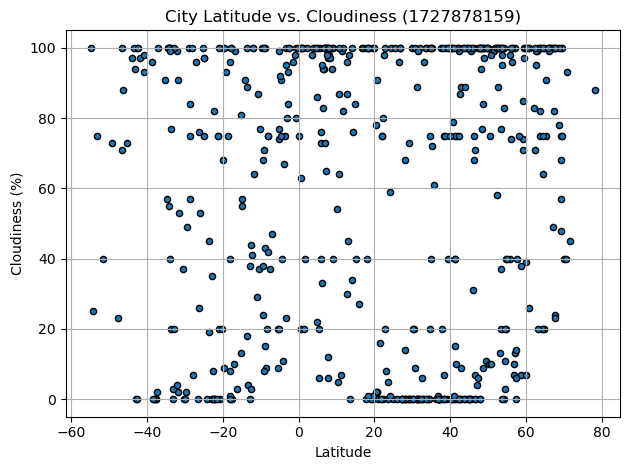

In [9]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

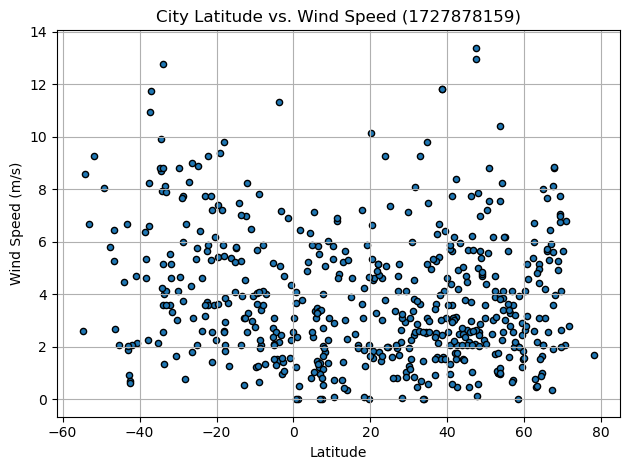

In [10]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout() 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show() 

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,soygaon,20.6000,75.6167,28.00,73,2,1.82,IN,1727878395
3,banda aceh,5.5577,95.3222,27.41,81,100,3.34,ID,1727878436
4,ribeira grande,38.5167,-28.7000,25.22,83,75,11.83,PT,1727878437
5,crane,31.3974,-102.3501,20.12,53,0,2.46,US,1727878438
6,poltavka,54.3663,71.7632,6.51,43,0,3.41,RU,1727878439


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,65,40,9.26,CL,1727878433
1,margaret river,-33.9500,115.0667,12.01,80,100,12.78,AU,1727878434
10,adamstown,-25.0660,-130.1015,20.29,67,97,5.75,PN,1727878347
12,punta arenas,-53.1500,-70.9167,6.06,75,75,6.69,CL,1727878323
13,bredasdorp,-34.5322,20.0403,16.89,59,100,8.70,ZA,1727878447


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8441328482784306


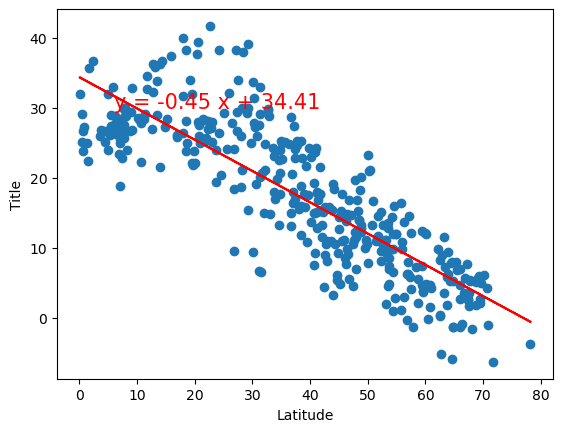

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30)) 

The r-squared is: 0.8061053951880585


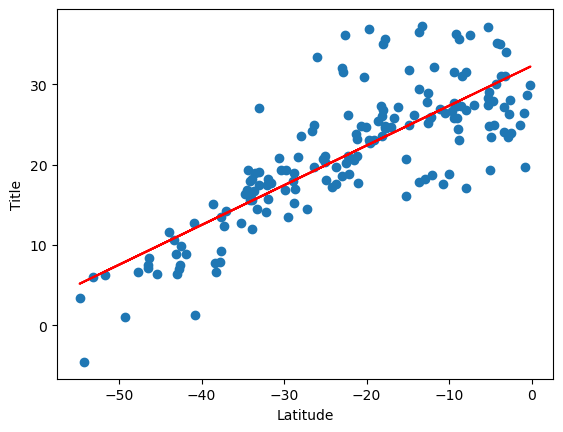

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40)) 

In [ ]:
Discussion about the linear relationship: The northern hemisphere has a very strong negative correlation. 
The southern hemisphere has a very strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07039148751089835


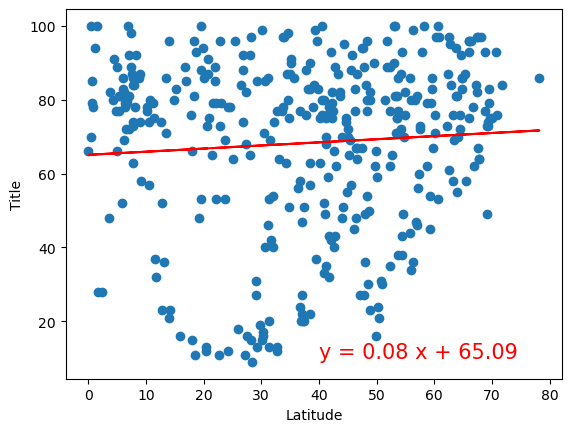

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.0811379271064005


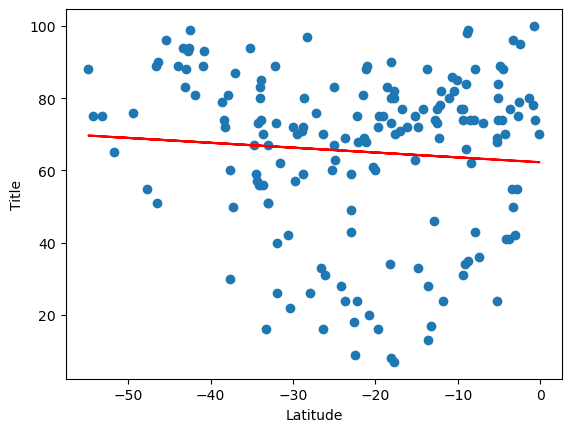

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150)) 

In [ ]:
Discussion about the linear relationship: The northern hemisphere has a slight positive correlation. 
The southern hemisphere has a slight negative correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05042571389349712


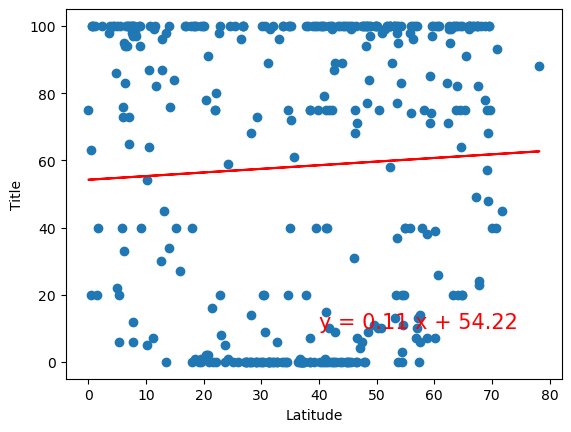

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.02148866118222017


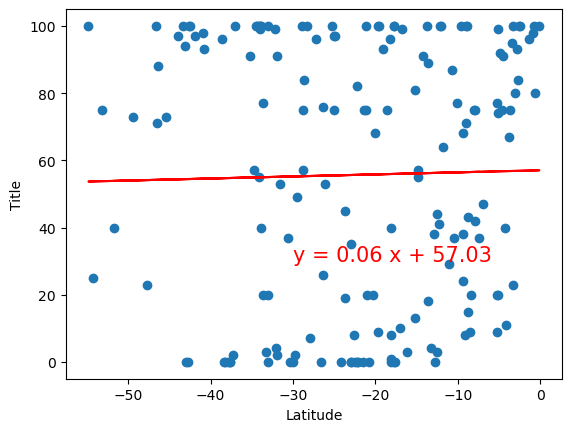

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** The northern hemisphere has a slight positive correlation. 
The southern hemisphere has virtually no correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.13599265182705467


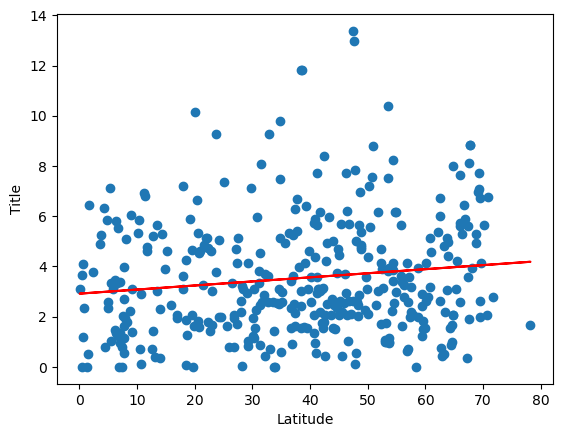

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25)) 

The r-squared is: -0.2656860159359976


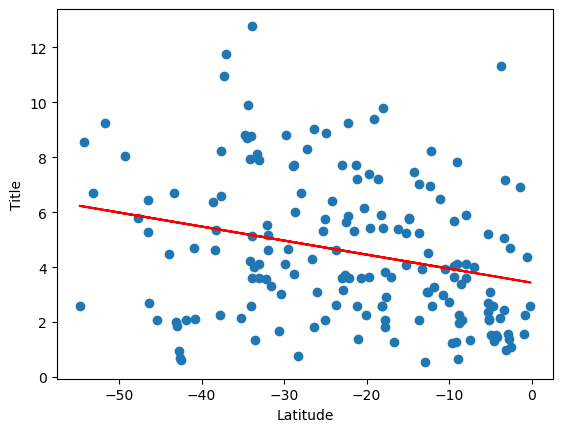

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** The northern hemisphere has a slight positive correlation. 
The southern hemisphere has a negative correlation.